In [20]:
# libraries to display dataframe and images
from IPython.display import display
from PIL import Image
# matplotlib for vizualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# inbuild library to work with textual data
import string
# Setting up the NLTK to pre-processing textual data
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('universal_tagset')
nltk.download('treebank')
nltk.download('punkt_tab')

sns.set_theme(style="darkgrid")
pd.set_option("display.max_columns", 100)
%matplotlib inline

[nltk_data] Downloading package punkt to /Users/prupro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prupro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/prupro/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/prupro/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /Users/prupro/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/prupro/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package treebank to /Users/prupro/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Do

In [2]:
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
import seaborn as sns
from matplotlib import pyplot as plt

# reading the csv data file
articles = pd.read_csv("medium_articles_v3.csv")
display(articles.head(10))
print("Shape of dataframe : {}".format(articles.shape))

,link,title,sub_title,author,reading_time,text,id
0,https://towardsdatascience.com/ensemble-method...,"Ensemble methods: bagging, boosting and stacking",Understanding the key concepts of ensemble lea...,Joseph Rocca,20,This post was co-written with Baptiste Rocca.\...,1
1,https://towardsdatascience.com/understanding-a...,Understanding AUC - ROC Curve,"In Machine Learning, performance measurement i...",Sarang Narkhede,5,"In Machine Learning, performance measurement i...",2
2,https://towardsdatascience.com/how-to-work-wit...,How to work with object detection datasets in ...,"A comprehensive guide to defining, loading, ex...",Eric Hofesmann,10,Microsoft's Common Objects in Context dataset ...,3
3,https://towardsdatascience.com/11-dimensionali...,11 Dimensionality reduction techniques you sho...,Reduce the size of your dataset while keeping ...,Rukshan Pramoditha,16,"In both Statistics and Machine Learning, the n...",4
4,https://towardsdatascience.com/the-time-series...,The Time Series Transformer,Attention Is All You Need they said. Is it a m...,Theodoros Ntakouris,6,Attention Is All You Need they said. Is it a m...,5
5,https://netflixtechblog.com/learning-a-persona...,Learning a Personalized Homepage,how to best tailor each member's homepage to m...,Netflix Technology Blog,15,by Chris Alvino and Justin Basilico\nAs we've ...,6
6,https://towardsdatascience.com/6-data-science-...,6 Data Science Certificates To Level Up Your C...,Pump up your portfolio and get closer to your ...,Sara A. Metwalli,6,Because of the appeal of the field of data sci...,7
7,https://towardsdatascience.com/transformers-ex...,Transformers Explained Visually (Part 2): How ...,A Gentle Guide to the Transformer under the ho...,Ketan Doshi,11,This is the second article in my series on Tra...,8
8,https://medium.com/coders-camp/60-python-proje...,60 Python Projects with Source Code,60 Python Projects with Source code solved and...,Aman Kharwal,2,Python has been in the top 10 popular programm...,9
9,https://towardsdatascience.com/geometric-found...,Geometric foundations of Deep Learning,Geometric Deep Learning is an attempt to unify...,Michael Bronstein,13,This blog post was co-authored with Joan Bruna...,10


Shape of dataframe : (208, 7)


In [3]:
articles.shape

(208, 7)

In [4]:
articles.describe(include='all')

,link,title,sub_title,author,reading_time,text,id
count,208,208,208,208,208.000000,208,208.000000
unique,208,208,204,179,NaN,208,NaN
top,https://towardsdatascience.com/ensemble-method...,"Ensemble methods: bagging, boosting and stacking",Update: This article is part of a series. Chec...,Adam Geitgey,NaN,This post was co-written with Baptiste Rocca.\...,NaN
freq,1,1,4,5,NaN,1,NaN
mean,NaN,NaN,NaN,NaN,12.375000,NaN,107.091346
std,NaN,NaN,NaN,NaN,13.880224,NaN,62.575453
min,NaN,NaN,NaN,NaN,2.000000,NaN,1.000000
25%,NaN,NaN,NaN,NaN,6.000000,NaN,52.750000
50%,NaN,NaN,NaN,NaN,9.000000,NaN,107.500000
75%,NaN,NaN,NaN,NaN,13.000000,NaN,162.250000


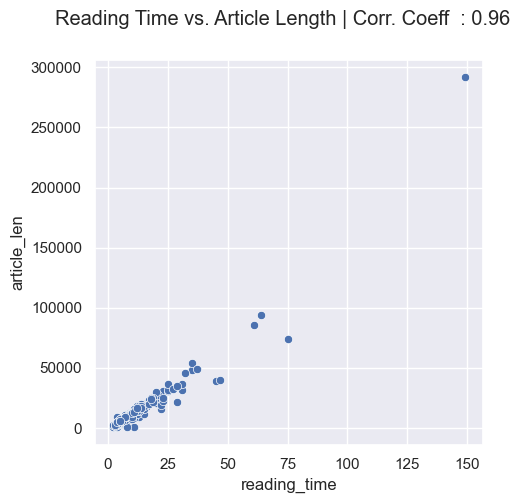

In [5]:
from scipy.stats import pearsonr

articles["article_len"] = articles["text"].apply(lambda x : len(x))
# creating scatterplot
fig, axes = plt.subplots(figsize = (5, 5))
sns.scatterplot(x = articles["reading_time"], y = articles["article_len"])
# Pearson correlation coefficient measures the linear relationship between two set of values.
corr_coeff, _ = pearsonr(articles["reading_time"], articles["article_len"])
# plot title
plt.suptitle("Reading Time vs. Article Length | Corr. Coeff  : {}".format(round(corr_coeff, 2)))
plt.show()

In [6]:
for author, count in dict(articles["author"].value_counts()).items():
    if(count < 2):
        continue
    print("Articles by {} :".format(author))
    for title in articles[articles["author"] == author]["title"].values:
        print(title)
    print("-"*120)

Articles by Adam Geitgey :
Machine Learning is Fun Part 5: Language Translation with Deep Learning and the Magic of Sequences
Machine Learning is Fun! Part 4: Modern Face Recognition with Deep Learning
Machine Learning is Fun! Part 3: Deep Learning and Convolutional Neural Networks
Machine Learning is Fun! Part 2
Machine Learning is Fun Part 6: How to do Speech Recognition with Deep Learning
------------------------------------------------------------------------------------------------------------------------
Articles by Joseph Rocca :
Ensemble methods: bagging, boosting and stacking
Understanding Variational Autoencoders (VAEs)
Understanding Generative Adversarial Networks (GANs)
------------------------------------------------------------------------------------------------------------------------
Articles by Natassha Selvaraj :
I tripled my income with data science. Here's how.
How to Land a Data Analytics Job in 6 Months
Top 10 Data Science Projects for Beginners
-----------------

In [7]:
import contractions

In [8]:
corpus = [
    "it was the best of times",
    "it was the worst of times",
    "it was the age of wisdom and the age of foolishness"
]

In [9]:
bow_rep = []
vocabulary = set([x for x in " ".join(corpus).lower().split(" ")])
print(vocabulary)
for sentence in corpus:
        sentence_rep = dict([(v,0) for v in vocabulary])
print(sentence_rep)

{'was', 'best', 'age', 'wisdom', 'times', 'of', 'it', 'the', 'foolishness', 'and', 'worst'}
{'was': 0, 'best': 0, 'age': 0, 'wisdom': 0, 'times': 0, 'of': 0, 'it': 0, 'the': 0, 'foolishness': 0, 'and': 0, 'worst': 0}


In [10]:
# Using CountVectorizer from scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
# Learn the vocabulary dictionary and return document-term matrix
bow_rep = cv.fit_transform(corpus).todense()  # todense() returns a matrix
# create dataframe
df = pd.DataFrame(bow_rep)
# Get output feature names for dataframe columns.
df.columns = cv.get_feature_names_out()
df.index = corpus
display(df)

,age,and,best,foolishness,it,of,the,times,was,wisdom,worst
it was the best of times,0,0,1,0,1,1,1,1,1,0,0
it was the worst of times,0,0,0,0,1,1,1,1,1,0,1
it was the age of wisdom and the age of foolishness,2,1,0,1,1,2,2,0,1,1,0


In [11]:
# using CountVectorizer for removing stop-words directly from the corpus.
cv = CountVectorizer(stop_words="english")
bow_rep = cv.fit_transform(corpus).todense()
df = pd.DataFrame(bow_rep)
df.columns = cv.get_feature_names_out()
df.index = corpus
display(df)

,age,best,foolishness,times,wisdom,worst
it was the best of times,0,1,0,1,0,0
it was the worst of times,0,0,0,1,0,1
it was the age of wisdom and the age of foolishness,2,0,1,0,1,0


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
# using inbuilt TfidfVectorizer() function to calculate TF-IDF
tf_idf_vectorizer = TfidfVectorizer()
tf_idf_rep = tf_idf_vectorizer.fit_transform(corpus).todense()
df = pd.DataFrame(tf_idf_rep)
df.columns = tf_idf_vectorizer.get_feature_names_out()
df.index = corpus
display(df)

,age,and,best,foolishness,it,of,the,times,was,wisdom,worst
it was the best of times,0.000000,0.000000,0.579897,0.000000,0.342496,0.342496,0.342496,0.441027,0.342496,0.000000,0.000000
it was the worst of times,0.000000,0.000000,0.000000,0.000000,0.342496,0.342496,0.342496,0.441027,0.342496,0.000000,0.579897
it was the age of wisdom and the age of foolishness,0.617558,0.308779,0.000000,0.308779,0.182370,0.364740,0.364740,0.000000,0.182370,0.308779,0.000000


In [13]:
# Bigram using TfidfVectorizer
tf_idf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
tf_idf_rep = tf_idf_vectorizer.fit_transform(corpus).todense()
df = pd.DataFrame(tf_idf_rep)
df.columns = tf_idf_vectorizer.get_feature_names_out()
df.index = corpus
display(df)

,age,age of,and,and the,best,best of,foolishness,it,it was,of,of foolishness,of times,of wisdom,the,the age,the best,the worst,times,was,was the,wisdom,wisdom and,worst,worst of
it was the best of times,0.000000,0.000000,0.000000,0.000000,0.400008,0.400008,0.000000,0.236251,0.236251,0.236251,0.000000,0.304216,0.000000,0.236251,0.000000,0.400008,0.000000,0.304216,0.236251,0.236251,0.000000,0.000000,0.000000,0.000000
it was the worst of times,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.236251,0.236251,0.236251,0.000000,0.304216,0.000000,0.236251,0.000000,0.000000,0.400008,0.304216,0.236251,0.236251,0.000000,0.000000,0.400008,0.400008
it was the age of wisdom and the age of foolishness,0.415353,0.415353,0.207677,0.207677,0.000000,0.000000,0.207677,0.122657,0.122657,0.245314,0.207677,0.000000,0.207677,0.245314,0.415353,0.000000,0.000000,0.000000,0.122657,0.122657,0.207677,0.207677,0.000000,0.000000


In [14]:
import re

In [15]:
def process_sentence(sentence, nlp_object):
    # Convert to lowercase
    sentence = sentence.lower()

    # Exapnding contractions
    sentence = contractions.fix(sentence)

    # Lemmatization and removing stopwords
    doc = nlp_object(sentence)
    sentence = " ".join([token.lemma_ for token in doc if not token.is_stop])

    # Remove punctuation
    for p in string.punctuation:
        sentence = sentence.replace(p, " ")
    sentence = re.sub(r"\s+", " ", sentence) # Replace all whitespace characters with space

    return sentence

In [16]:
import spacy.cli
spacy.cli.download("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 22.6 MB/s eta 0:00:00 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip


In [17]:
print(articles.columns)


Index(['link', 'title', 'sub_title', 'author', 'reading_time', 'text', 'id',
       'article_len'],
      dtype='object')


In [21]:
from tqdm.notebook import tqdm
# tqdm to see real time progress
tqdm.pandas()

nlp = spacy.load('en_core_web_sm') # English pipeline optimized for CPU

def process_article(article_text, nlp_object):
    processed_article_sentences = []
    # using nltk sentence tokenizer
    for sentence in sent_tokenize(article_text):
        # preprocessing each sentence using our process_sentence function
        processed_article_sentences.append(process_sentence(sentence, nlp_object))
    # joining preprocessed sentence as a complete paragrams of the article
    return " ".join(processed_article_sentences)

articles["processed_text"] = articles["text"].progress_apply(lambda x : process_article(x, nlp))


  0%|          | 0/208 [00:00<?, ?it/s]

In [22]:
# BOW representation of the dataset Using CountVectorizer from scikit-learn
count_vectorizer = CountVectorizer(min_df=5)
# min_df: ignore terms that have a document frequency strictly lower than the given threshold.

# Learn the vocabulary dictionary and return document-term matrix
bow_features = count_vectorizer.fit_transform(articles["processed_text"]).todense() # todense() returns a matrix
# create dataframe
bow_features_df = pd.DataFrame(bow_features)
bow_features_df.columns = count_vectorizer.get_feature_names_out() # Get output feature names for dataframe columns.
bow_features_df["TITLE"] = articles["title"]
bow_features_df["ID"] = articles["id"]
display(bow_features_df)

,00,000,01,05,06,07,10,100,1000,101,10k,10x,11,12,120,125,128,13,14,15,150,16,17,18,19,1980,1989,1990,1k,1st,20,200,2000,2001,2005,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,21,...,winter,wire,wise,wish,withdraw,woman,wonder,wonderful,wood,word,work,worker,workflow,working,workout,world,worried,worry,worsen,worth,wow,wrap,write,writer,writing,wrong,www,xgboost,xi,yeah,year,yearly,yellow,yes,yesterday,yield,yo,york,you,young,youtube,zero,zhou,zip,zombie,zone,zoom,zuckerberg,TITLE,ID
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Ensemble methods: bagging, boosting and stacking",1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Understanding AUC - ROC Curve,2
2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,How to work with object detection datasets in ...,3
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,3,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,11 Dimensionality reduction techniques you sho...,4
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,The Time Series Transformer,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,1,0,0,3,0,0,0,0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Type 2 Diabetes Reversal The Quick Start Guide,210
204,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,2,0,0,How a 22 Day Water Fast Changed My Life,211
205,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Breaking Your Fast,212
206,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,11 Unusual Tips for How to Wake Up Early,213


In [23]:
from sklearn.manifold import TSNE
# using t-sne to observe any trends, and clusters.
tsne = TSNE(n_components=2) # n_components: estimated number of components
tsne_bow_features = tsne.fit_transform(bow_features_df[count_vectorizer.get_feature_names_out()].values)
tsne_bow_features_df = pd.DataFrame(tsne_bow_features)
tsne_bow_features_df.columns = ["C1", "C2"]
tsne_bow_features_df["TITLE"] = bow_features_df["TITLE"]
tsne_bow_features_df["ID"] = bow_features_df["ID"]

display(tsne_bow_features_df)

,C1,C2,TITLE,ID
0,1.383940,-4.536492,"Ensemble methods: bagging, boosting and stacking",1
1,-0.719068,-0.520001,Understanding AUC - ROC Curve,2
2,0.298191,-2.954882,How to work with object detection datasets in ...,3
3,-0.420509,-4.320594,11 Dimensionality reduction techniques you sho...,4
4,1.005822,-1.902081,The Time Series Transformer,5
...,...,...,...,...
203,1.157165,3.990360,Type 2 Diabetes Reversal The Quick Start Guide,210
204,0.242183,5.346517,How a 22 Day Water Fast Changed My Life,211
205,0.377055,5.256718,Breaking Your Fast,212
206,-1.552275,4.267197,11 Unusual Tips for How to Wake Up Early,213


In [24]:
import plotly.express as px
# scatter plot of t-sne for the BOW representation

title = "T-distributed Stochastic Neighbor Embedding for BOW document representation"

fig = px.scatter(tsne_bow_features_df, x="C1", y="C2", hover_data=['TITLE'], title=title)
fig.show()

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

def get_similar_documents(all_article_rep_df, article_id, features):
    # extracting features of a article
    this_article_rep = all_article_rep_df[all_article_rep_df["ID"] == article_id][features]
    other_article_rep = all_article_rep_df[all_article_rep_df["ID"] != article_id][features]
    # calculating cosine similarity
    similarity_matrix = cosine_similarity(this_article_rep, other_article_rep)
    similar_articles = list(zip(similarity_matrix[0].tolist(), all_article_rep_df["TITLE"].tolist()))
    # sorting
    similar_articles = sorted(similar_articles, key = lambda x : x[0], reverse = True)
    print("Reference Article : {}".format(all_article_rep_df[all_article_rep_df["ID"] == article_id]["TITLE"].values[0]))

    print("**** Similar Articles ****")
    # top 5 similar articles
    for score, title in similar_articles[:5]:
        print(title)
    print()

# Let us check top 5 similar articles for some of the articles in our corpus
get_similar_documents(bow_features_df, 90, count_vectorizer.get_feature_names_out())
get_similar_documents(bow_features_df, 80, count_vectorizer.get_feature_names_out())
get_similar_documents(bow_features_df, 150, count_vectorizer.get_feature_names_out())
get_similar_documents(bow_features_df, 205, count_vectorizer.get_feature_names_out())

Reference Article : 17 types of similarity and dissimilarity measures used in data science.
**** Similar Articles ****
9 Distance Measures in Data Science
17 Clustering Algorithms Used In Data Science and Mining
Machine Learning Basics with the K-Nearest Neighbors Algorithm
OVER 100 Data Scientist Interview Questions and Answers!
Fundamental Techniques of Feature Engineering for Machine Learning

Reference Article : TensorFlow Tutorial Part 1
**** Similar Articles ****
How to go from a Python newbie to a Google Certified TensorFlow Developer under two months
Enchanted Random Forest
The 7 Best Data Science and Machine Learning Podcasts
PCA using Python (scikit-learn)
Time Series Forecasting with PyCaret Regression Module

Reference Article : The One Word That Explains Why Economics Professors Are Not Billionaires
**** Similar Articles ****
Why People Still Don't Get Cryptocurrency
You May Have A Poor Person's Mindset And Not Know It
You Will Never Be Rich If You Keep Doing These 10 thin

In [27]:
# TF-IDF representation of the dataset Using TfidfVectorizer from scikit-learn
tfidf_vectorizer = TfidfVectorizer(min_df=5)
# min_df: ignore terms that have a document frequency strictly lower than the given threshold.
tfidf_features = tfidf_vectorizer.fit_transform(articles["processed_text"]).todense()  # todense() returns a matrix
# create dataframe
tfidf_features_df = pd.DataFrame(tfidf_features)
tfidf_features_df.columns = tfidf_vectorizer.get_feature_names_out()  # Get output feature names for dataframe columns.
tfidf_features_df["TITLE"] = articles["title"]
tfidf_features_df["ID"] = articles["id"]
display(tfidf_features_df)

,00,000,01,05,06,07,10,100,1000,101,10k,10x,11,12,120,125,128,13,14,15,150,16,17,18,19,1980,1989,1990,1k,1st,20,200,2000,2001,2005,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,21,...,winter,wire,wise,wish,withdraw,woman,wonder,wonderful,wood,word,work,worker,workflow,working,workout,world,worried,worry,worsen,worth,wow,wrap,write,writer,writing,wrong,www,xgboost,xi,yeah,year,yearly,yellow,yes,yesterday,yield,yo,york,you,young,youtube,zero,zhou,zip,zombie,zone,zoom,zuckerberg,TITLE,ID
0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.008056,0.005185,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.013613,0.0,0.0,0.000000,0.000000,0.009264,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,"Ensemble methods: bagging, boosting and stacking",1
1,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.014092,0.0,0.0,0.000000,0.025664,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,Understanding AUC - ROC Curve,2
2,0.000000,0.0,0.0,0.0,0.019288,0.0,0.008322,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.014724,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.022901,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.015030,0.0,0.0,0.010865,0.013686,0.000000,0.0,0.0,0.006687,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,How to work with object detection datasets in ...,3
3,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.006738,0.000000,0.0,0.0,0.0,0.0,0.008670,0.006796,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.013306,0.0,0.0,0.0,0.0,0.013772,0.000000,0.008339,0.000000,0.0,0.0,0.0,0.017465,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.006571,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.006363,0.0,0.0,0.000000,0.000000,0.0,0.0,11 Dimensionality reduction techniques you sho...,4
4,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034284,0.000000,0.039491,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.034284,0.0,0.000000,0.000000,0.0,0.0,0.021512,0.027692,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,The Time Series Transformer,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [28]:
tsne = TSNE(n_components=2)
tsne_tfidf_features = tsne.fit_transform(tfidf_features_df[tfidf_vectorizer.get_feature_names_out()].values)
tsne_tfidf_features_df = pd.DataFrame(tsne_tfidf_features)
tsne_tfidf_features_df.columns = ["C1", "C2"]
tsne_tfidf_features_df["TITLE"] = tfidf_features_df["TITLE"]
display(tsne_tfidf_features_df)

,C1,C2,TITLE
0,4.594442,-17.164526,"Ensemble methods: bagging, boosting and stacking"
1,9.094215,-19.818073,Understanding AUC - ROC Curve
2,2.201585,-9.697381,How to work with object detection datasets in ...
3,8.018794,-12.832398,11 Dimensionality reduction techniques you sho...
4,-2.673004,-15.714199,The Time Series Transformer
...,...,...,...
203,4.754317,22.501987,Type 2 Diabetes Reversal The Quick Start Guide
204,3.297285,18.342972,How a 22 Day Water Fast Changed My Life
205,4.289151,18.891865,Breaking Your Fast
206,3.465235,13.650113,11 Unusual Tips for How to Wake Up Early


In [29]:
title = "T-distributed Stochastic Neighbor Embedding for TFIDF document representation"
fig = px.scatter(tsne_tfidf_features_df, x="C1", y="C2", hover_data=['TITLE'], title=title)
fig.show()